## 데이터 분석
소셜 미디어 사용시간이 정신 건강에 영향을 미치는지 분석

* 데이터 출처: https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health/data
* FYI - the test was conducted in Dhaka, capital city of Bangladesh

## Data Cleaning

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('data.csv')

#print(df.info())

# Rename columns
df = df.rename(columns={
    '1. What is your age?' : 'Age',
    '2. Gender' : 'Sex',
    '4. Occupation Status' : 'Occupation',
    '6. Do you use social media?' : 'Is social media user',
    '8. What is the average time you spend on social media every day?' : 'Hours on social media',
    '10. How often do you get distracted by Social media when you are busy doing something?' : 'Distraction',
    '11. Do you feel restless if you haven\'t used Social media in a while?' : 'Restlessness',
    '13. On a scale of 1 to 5, how much are you bothered by worries?' : 'Worries',
    '14. Do you find it difficult to concentrate on things?' : 'Concentration',
    '18. How often do you feel depressed or down?' : 'Depression',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?' : 'Insomnia'
})

# Remove columns
columns_to_remove = ['Timestamp', '3. Relationship Status', '5. What type of organizations are you affiliated with?', '7. What social media platforms do you commonly use?', '9. How often do you find yourself using Social media without a specific purpose?', '12. On a scale of 1 to 5, how easily distracted are you?', '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?', '16. Following the previous question, how do you feel about these comparisons, generally speaking?', '17. How often do you look to seek validation from features of social media?', '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?']
df = df.drop(columns=columns_to_remove)

# Change age data type from float to int
df['Age'] = df['Age'].astype(int)
# print(df['Age'].dtype)
# df.info()

# Replace values in 'Occupation' column; 'School Student' over 18 -> 'University Student'
df.loc[(df['Occupation'] == 'School Student') & (df['Age'] > 18), 'Occupation'] = 'University Student'

# Replace values in 'sex' column
df['Sex'] = df['Sex'].apply(lambda x: x if x in ['Male', 'Female'] else 'Non-binary')

# Count the number of 'Non-binary' entries
non_binary_count = df['Sex'].value_counts().get('Non-binary', 0)
# print(f"Number of Non-binary entries: {non_binary_count}") # 7 entries

# Remove rows where age is over 90
df = df[df['Age'] <= 90]

# Print counts of each category in 'Sex' column
sex_counts = df['Sex'].value_counts()
for sex, count in sex_counts.items():
    print(f"{sex}: {count}")
    
# Print counts of each category in 'Age' column
# age_counts = df['Age'].value_counts()
# for age, count in age_counts.items():
#     print(f"{age}: {count}")

# Relabeling 'Hours on social media' column
df.loc[df['Hours on social media'] == 'More than 5 hours', 'Hours on social media'] = '5.5h'
df.loc[df['Hours on social media'] == 'Between 2 and 3 hours', 'Hours on social media'] = '2.5h'
df.loc[df['Hours on social media'] == 'Between 3 and 4 hours', 'Hours on social media'] = '3.5h'
df.loc[df['Hours on social media'] == 'Between 1 and 2 hours', 'Hours on social media'] = '1.5h'
df.loc[df['Hours on social media'] == 'Between 4 and 5 hours', 'Hours on social media'] = '4.5h'
df.loc[df['Hours on social media'] == 'Less than an Hour', 'Hours on social media'] = '0.5h'

# Remove rows where 'Is social media user' is 'No'
df = df[df['Is social media user'] != 'No']
# Is social media user counts
# social_media_user_counts = df['Is social media user'].value_counts()
# print("Counts of Social Media User?:")
# print(social_media_user_counts)

#determining data shape (number of rows, columns)
print(df.shape) 

#df.head()


Female: 262
Male: 211
Non-binary: 7
(477, 11)


## Data Aggragation

총점(Total Score)이 높을수록 참여자의 정신 건강 상태가 나쁘다고 가정해 볼 수 있다

- 1 = very negative
- 2 = negative
- 3 = netral
- 4 = positive
- 5 = very positive

In [112]:
# Aggregate data to create a mental health score
df['Total Score'] = df[['Distraction', 'Restlessness', 'Worries', 'Concentration', 'Depression', 'Insomnia']].sum(axis=1)
# print(df['Total Score'])

#df.head()

## Charts


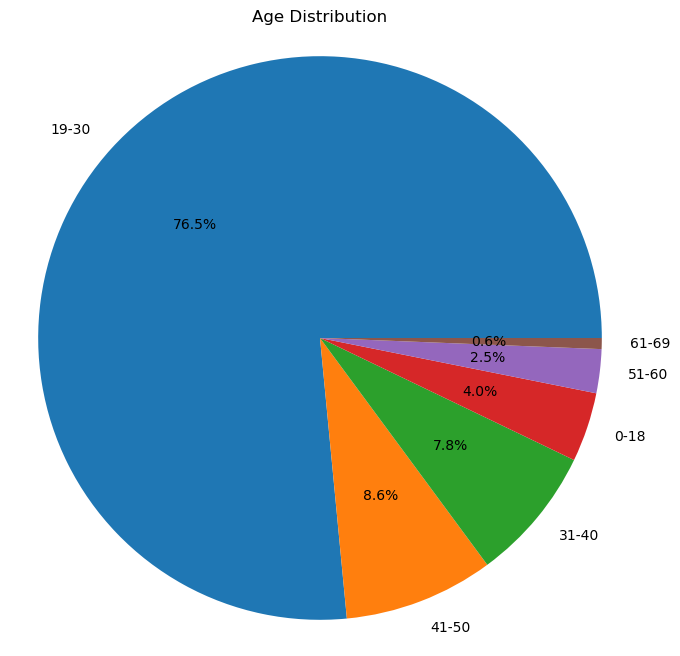

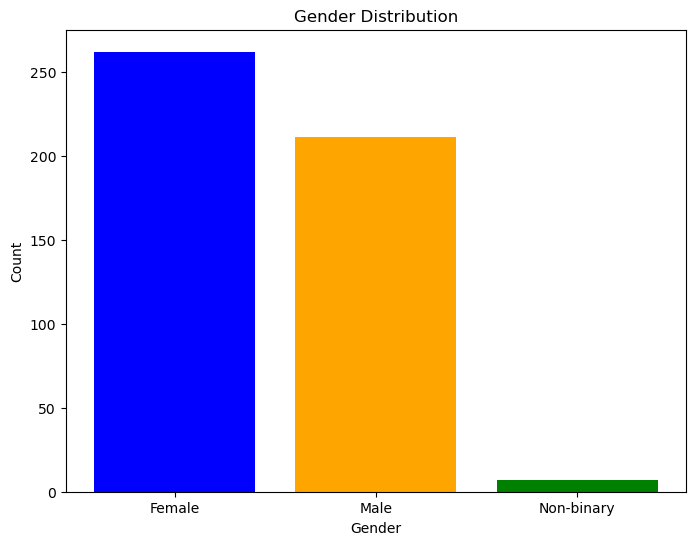

In [113]:
bins = [0, 18, 30, 40, 50, 60, 70]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-69']

# Assign age groups based on bins
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the count of each age group
age_group_counts = df['Age Group'].value_counts()

# Pie chart for age distribution
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%')
plt.title('Age Distribution')
plt.axis('equal') 
plt.show()

# Create a bar chart for the 'sex' column
plt.figure(figsize=(8, 6))
plt.bar(sex_counts.index, sex_counts.values, color=['blue', 'orange', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

## 소셜 미디어 사용 시간

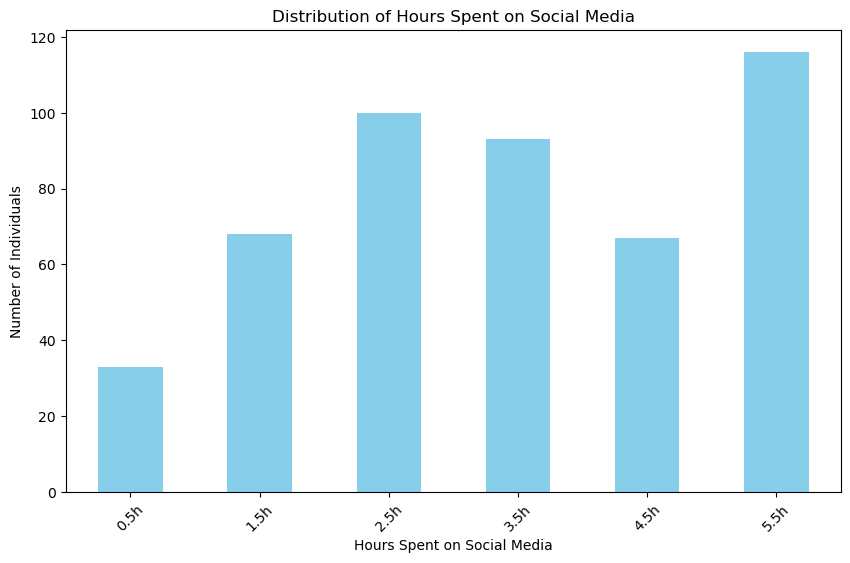

In [114]:
# Calculate the distribution of hours spent on social media
hours_distribution = df['Hours on social media'].value_counts().sort_index()

# Create a bar chart for the distribution of hours spent on social media
plt.figure(figsize=(10, 6))
hours_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Hours Spent on Social Media')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Hours Spent on Social Media')
plt.xticks(rotation=45)
plt.show()

Correlation between hours spent on social media and mental health: 0.44547266010813225


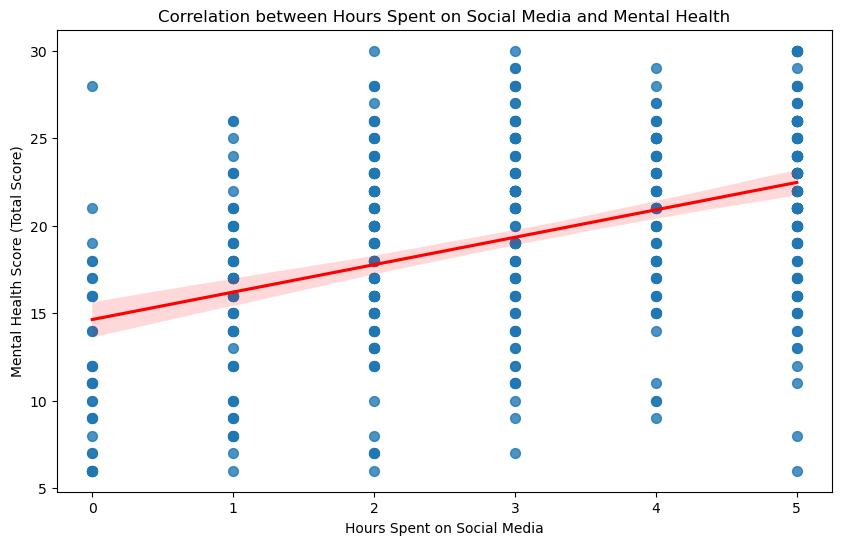

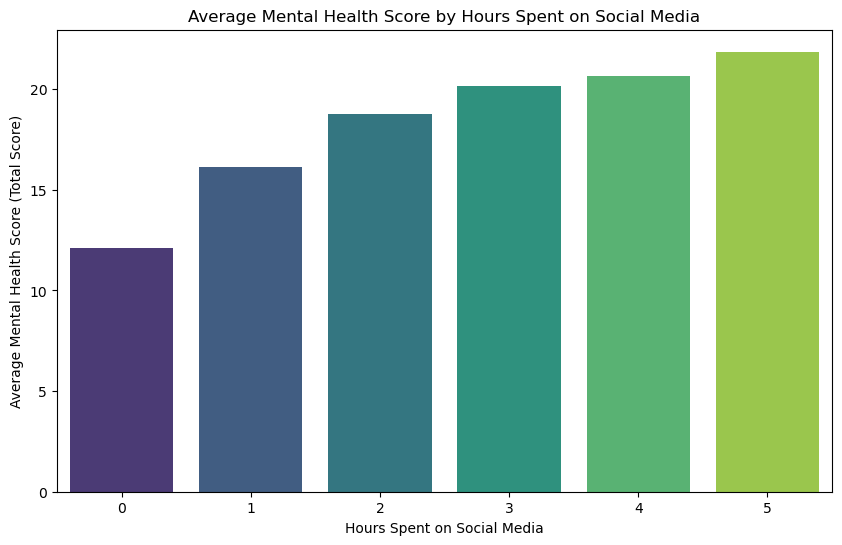

In [115]:
# Implement a score system for hours on social media
# Ensure 'Hours on social media' is of type string before replacing 'h' and converting to float
df['Hours on social media'] = df['Hours on social media'].astype(str).str.replace('h', '').astype(float)

# Convert to int
df['Hours on social media'] = df['Hours on social media'].astype(int)

# Calculate correlation between hours spent on social media and mental health
hours_correlation = df[['Hours on social media', 'Total Score']].corr().iloc[0, 1]
print(f"Correlation between hours spent on social media and mental health: {hours_correlation}")

# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Hours on social media', y='Total Score', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.xlabel('Hours Spent on Social Media')
plt.ylabel('Mental Health Score (Total Score)')
plt.title('Correlation between Hours Spent on Social Media and Mental Health')
plt.show()

# Calculate average mental health score by hours spent on social media
avg_mental_health_score = df.groupby('Hours on social media')['Total Score'].mean().reset_index()
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Hours on social media', y='Total Score', data=avg_mental_health_score, palette='viridis')
plt.xlabel('Hours Spent on Social Media')
plt.ylabel('Average Mental Health Score (Total Score)')
plt.title('Average Mental Health Score by Hours Spent on Social Media')
plt.show()

#df.head()

## 결론
* 소셜 미디어 사용시간과 정신 건강의 상관계수: 0.445
* 소셜 미디어 사용시간과 정신 건강 사이에 약한 상관관계가 있다고 추정해 볼 수 있다.